In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
data=pd.read_csv("C:/Users/marve/Vidhyuth/Jupyter/Codsoft/CreditCardFraud/fraudTrain.csv")

In [4]:
print(data.info(),'=====================')
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
train_data=data.drop(['Unnamed: 0'],axis=1)

<AxesSubplot:>

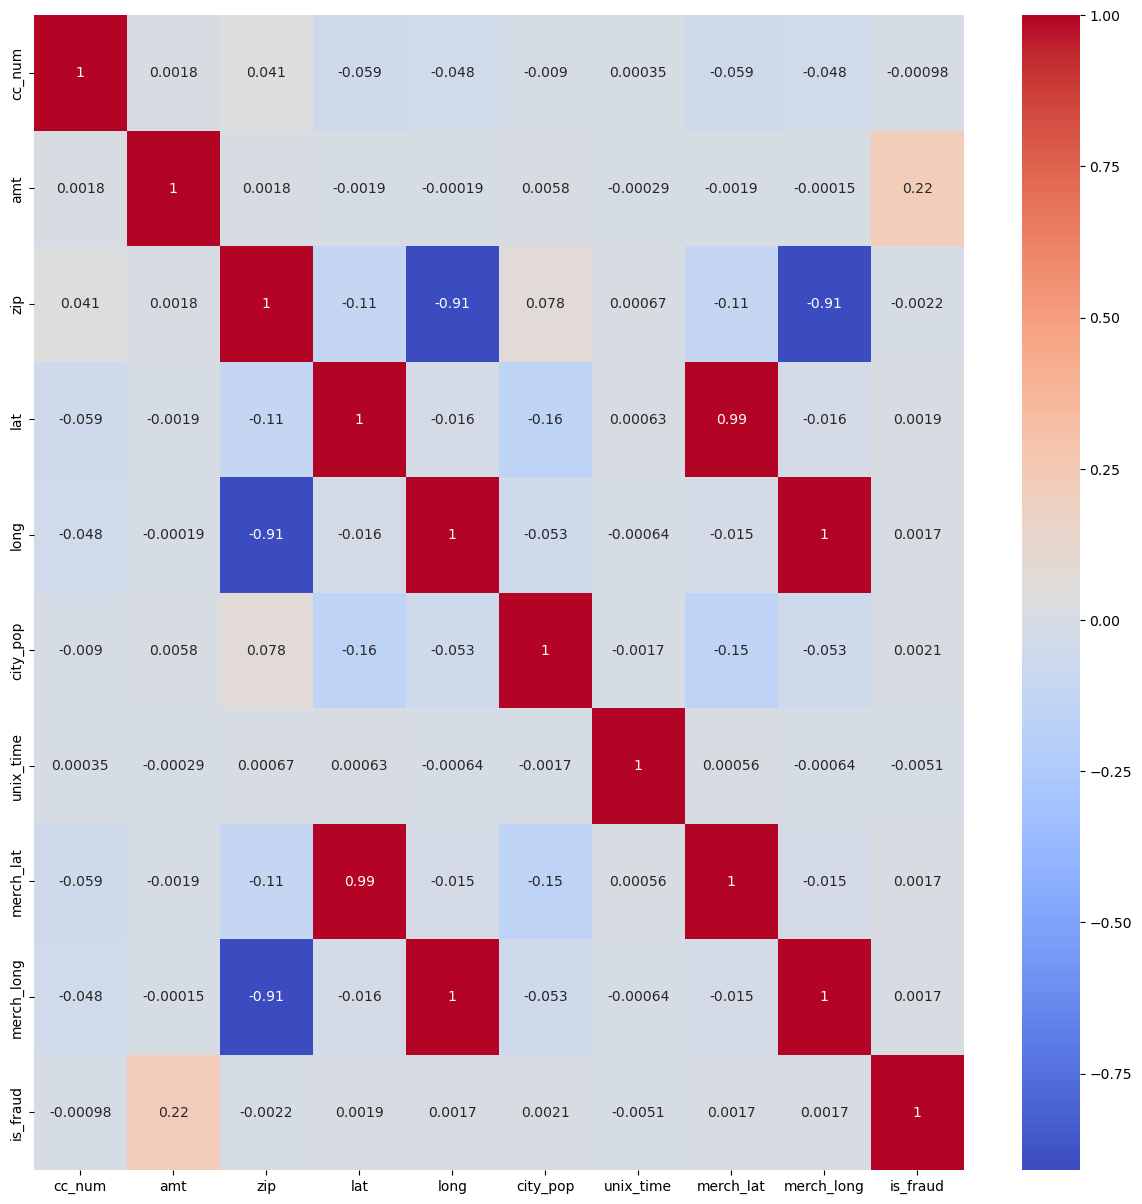

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr(),cmap='coolwarm',annot=True)

In [7]:
train_data.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

0    1289169
1       7506
Name: is_fraud, dtype: int64


<AxesSubplot:xlabel='is_fraud', ylabel='count'>

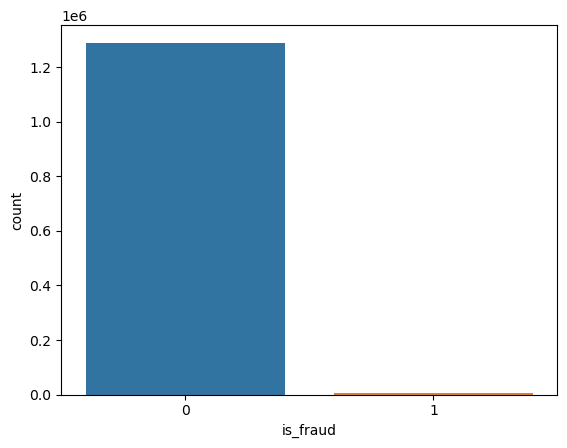

In [8]:
print(train_data['is_fraud'].value_counts())
sns.countplot(x=train_data['is_fraud'])

In [9]:
x=train_data[['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']]
y=train_data['is_fraud']
#from sklearn.preprocessing import StandardScaler
#x=StandardScaler().fit_transform(x)

In [10]:
test_data=pd.read_csv("C:/Users/marve/Vidhyuth/Jupyter/Codsoft/CreditCardFraud/fraudTest.csv")
x_test=test_data[['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']]
y_test=test_data['is_fraud']
#x_test=StandardScaler().fit_transform(x_test)

0    553574
1      2145
Name: is_fraud, dtype: int64


<AxesSubplot:xlabel='is_fraud', ylabel='count'>

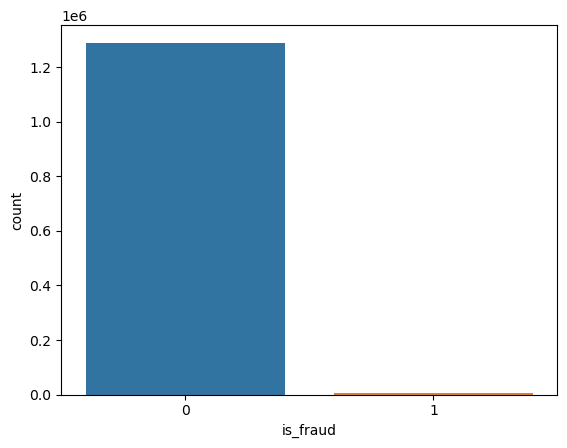

In [21]:
print(test_data['is_fraud'].value_counts())
sns.countplot(x=train_data['is_fraud'])

In [11]:
def metrics(y_pred):
    print("Accuracy: ",accuracy_score(y_test,y_pred))
    print("Precision: ",precision_score(y_test,y_pred))
    print("Recall: ",recall_score(y_test,y_pred))
    print("F1 Score: ",f1_score(y_test,y_pred))

In [12]:
dtree=DecisionTreeClassifier()
dtree.fit(x,y)

DecisionTreeClassifier()

In [13]:
y_pred=dtree.predict(x_test)
metrics(y_pred)

Accuracy:  0.993163811206743
Precision:  0.1678714859437751
Recall:  0.19487179487179487
F1 Score:  0.18036677454153183


In [15]:
log_reg=LogisticRegression()
log_reg.fit(x,y)
log_reg_pred=log_reg.predict(x_test)
metrics(log_reg_pred)

Accuracy:  0.9954995240400274
Precision:  0.0
Recall:  0.0
F1 Score:  0.0


In [19]:
rfc=RandomForestClassifier(n_estimators = 100, max_depth = 12, random_state = 2)
rfc.fit(x,y)

RandomForestClassifier(max_depth=12, random_state=2)

In [20]:
rfc_pred=rfc.predict(x_test)
metrics(rfc_pred)

Accuracy:  0.9959907795126673
Precision:  0.42095238095238097
Recall:  0.10303030303030303
F1 Score:  0.1655430711610487
